In [1]:
!pip install diagrams

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 71.4 MB/s eta 0:00:00


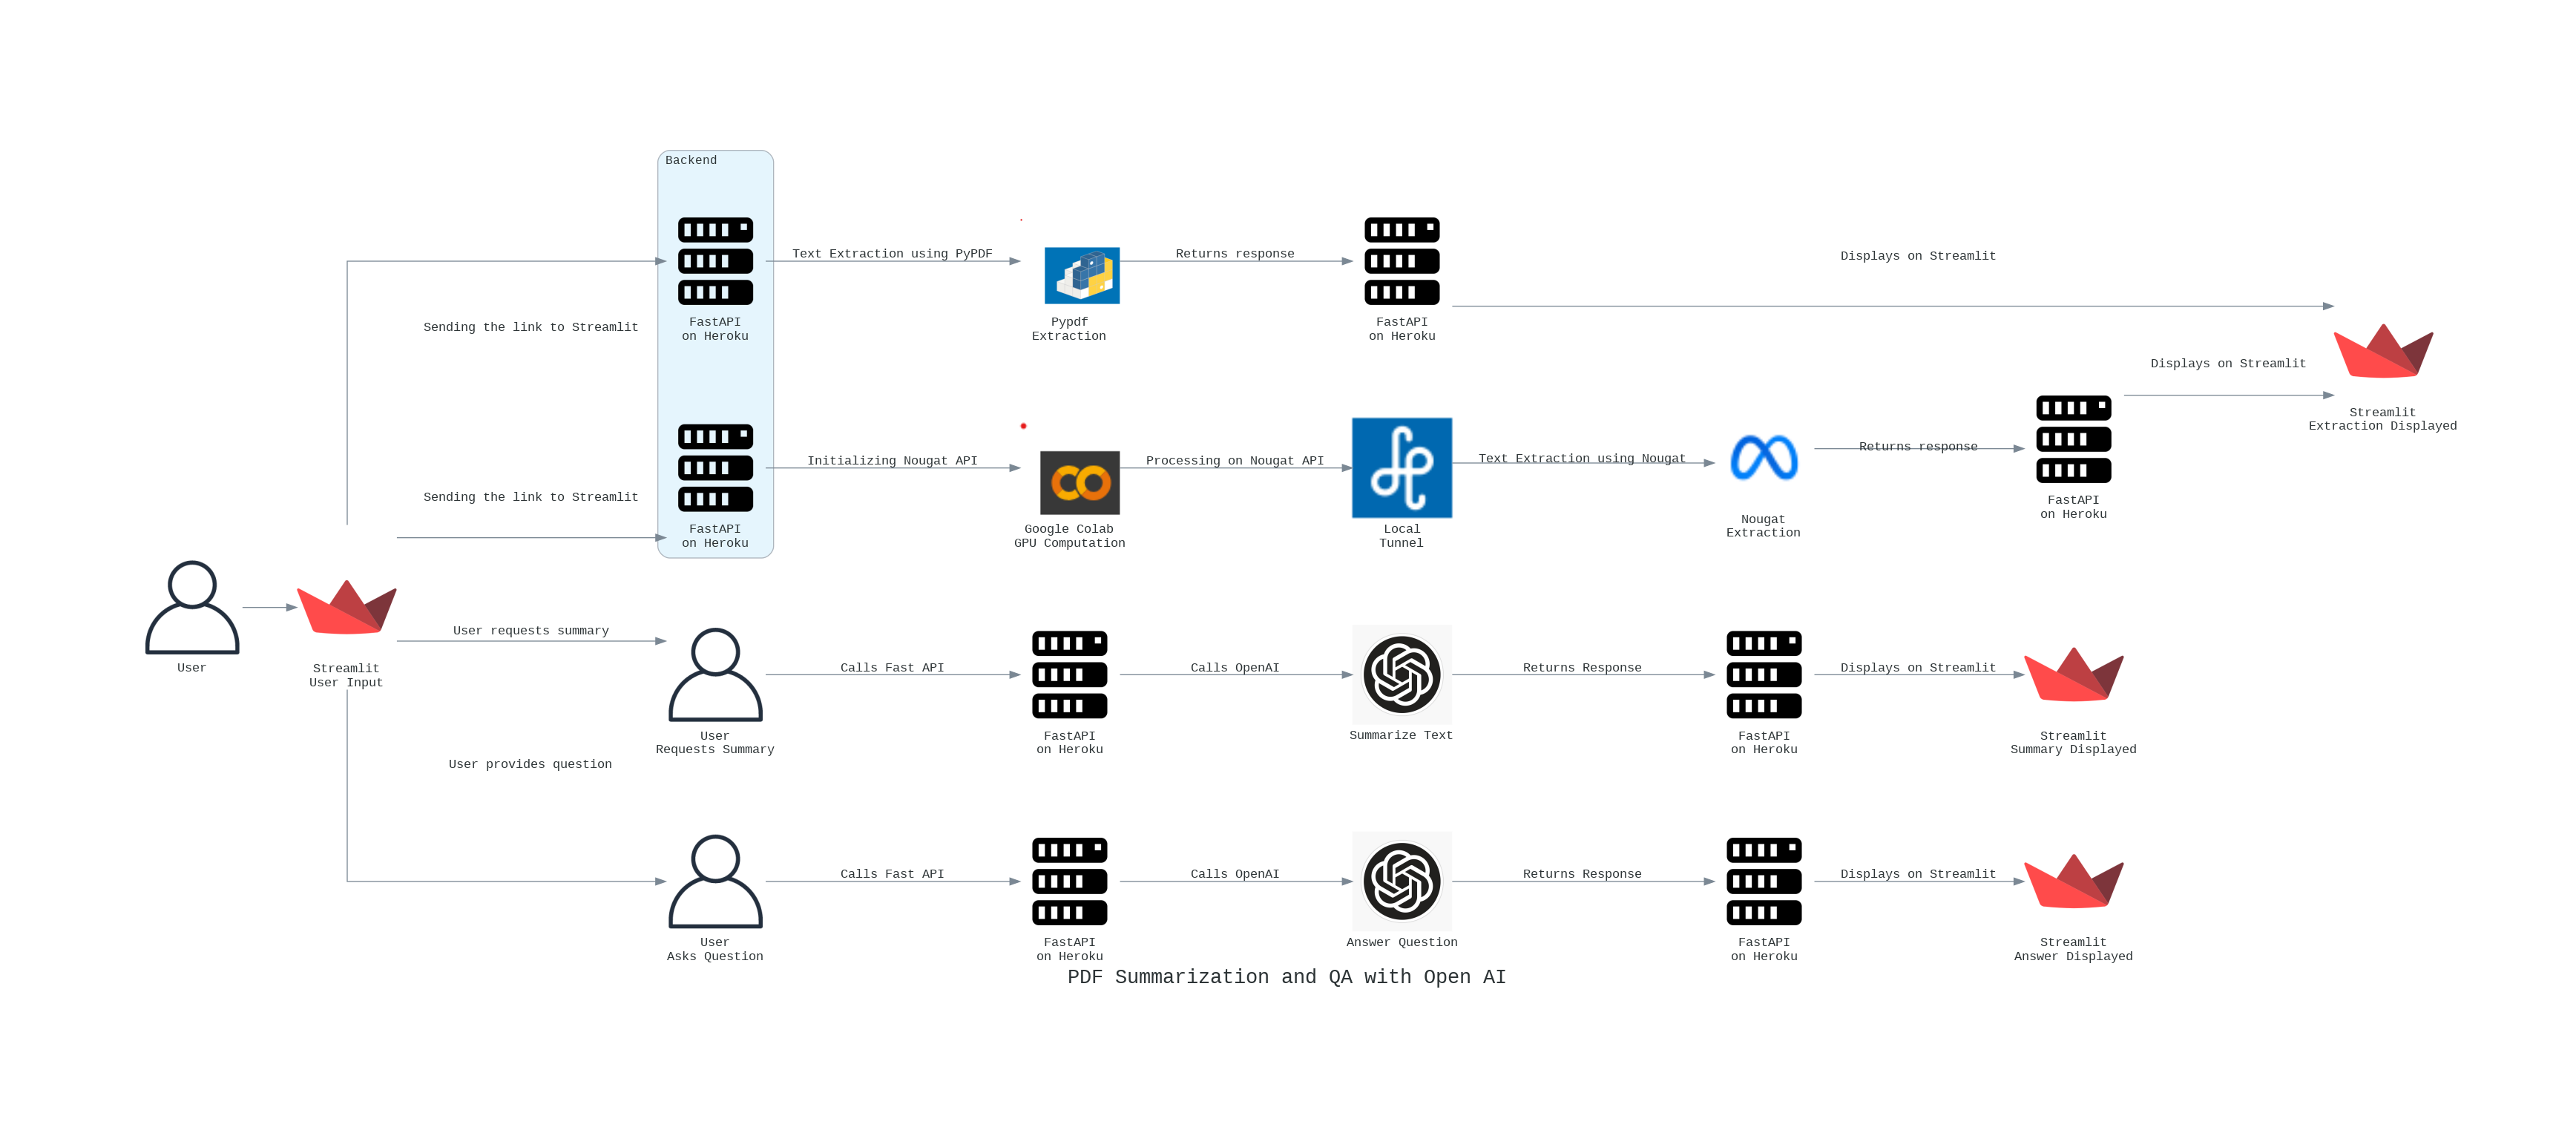

In [10]:
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.client import User
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.programming.language import Python
from diagrams.programming.framework import FastAPI
from diagrams.custom import Custom

graph_attr = {
    "fontsize": "20",
    "bgcolor": "transparent"
}

with Diagram("PDF Summarization and QA with Open AI", show=False, direction="LR", graph_attr=graph_attr) as diag:
    user = User("User")
    user_in_streamlit = Custom("Streamlit\nUser Input", "/content/streamlit logo.png")
    extr_in_streamlit = Custom("Streamlit\nExtraction Displayed", "/content/streamlit logo.png")
    summary_streamlit = Custom("Streamlit\nSummary Displayed", "/content/streamlit logo.png")
    qa_in_streamlit = Custom("Streamlit\nAnswer Displayed", "/content/streamlit logo.png")
    colab = Custom("Google Colab\nGPU Computation", "/content/colab_logo.png")
    nougat = Custom("Nougat\nExtraction", "/content/nougat_logo.png")
    pypdf = Custom("Pypdf\nExtraction", "/content/pypdf.png")
    localtunnel = Custom("Local\nTunnel", "/content/localtunnel.png")
    user >> user_in_streamlit
    OpenAI_sum = Custom("Summarize Text", "/content/openai.jpg")
    OpenAI_qa = Custom("Answer Question", "/content/openai.jpg")

    with Cluster("Backend"):
        user_in_streamlit >> Edge(label = "Sending the link to Streamlit") >> Server("FastAPI\non Heroku") >> Edge(label = "Text Extraction using PyPDF") >>  pypdf
        user_in_streamlit >> Edge(label = "Sending the link to Streamlit") >>  Server("FastAPI\non Heroku") >> Edge(label = "Initializing Nougat API") >> colab >> Edge(label = "Processing on Nougat API") >> localtunnel >> Edge(label = "Text Extraction using Nougat") >> nougat

    user_summary_request = User("User\nRequests Summary")
    user_in_streamlit >> Edge(label = "User requests summary") >> user_summary_request
    user_summary_request >> Edge(label = "Calls Fast API") >> Server("FastAPI\non Heroku") >> Edge(label = "Calls OpenAI") >>  OpenAI_sum >> Edge(label = "Returns Response") >> Server("FastAPI\non Heroku") >> Edge(label = "Displays on Streamlit") >> summary_streamlit

    pypdf >> Edge(label = "Returns response") >> Server("FastAPI\non Heroku") >> Edge(label = "Displays on Streamlit") >> extr_in_streamlit
    nougat >> Edge(label = "Returns response") >> Server("FastAPI\non Heroku") >> Edge(label = "Displays on Streamlit") >> extr_in_streamlit

    user_question_request = User("User\nAsks Question")
    user_in_streamlit >> Edge(label = "User provides question") >>user_question_request
    user_question_request >> Edge(label = "Calls Fast API") >> Server("FastAPI\non Heroku") >> Edge(label = "Calls OpenAI") >> OpenAI_qa >> Edge(label = "Returns Response") >> Server("FastAPI\non Heroku") >> Edge(label = "Displays on Streamlit") >> qa_in_streamlit
diag